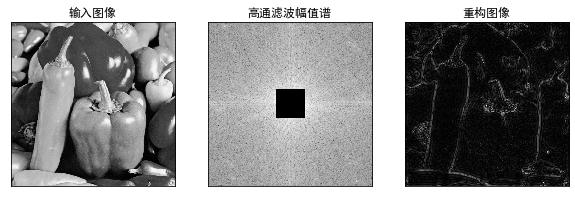

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlinBackend.figure_format="retina"
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负

img = cv.imread(r'..\img\i_peppers_gray.bmp', 0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20 * np.log(1+np.abs(fshift))
angle_spectrum = np.abs(np.angle(fshift))

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.figure(figsize=(10,6))
plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('输入图像'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(20 * np.log(1+np.abs(fshift)), cmap = 'gray')
plt.title('高通滤波幅值谱'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back,cmap = 'gray')
plt.title('重构图像'), plt.xticks([]), plt.yticks([])
plt.show()
